# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    fder = (-3/2*f(x)+2*f(x+h)-1/2*f(x+2*h))/h
    return fder

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [3]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10
0.000001 --  -2e-12
0.000000 --  -2e-14
0.000000 --  -2e-16
0.000000 --  -2e-18


Отклонение пропорцианально квадрату шага, как и ожидалось 

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [4]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

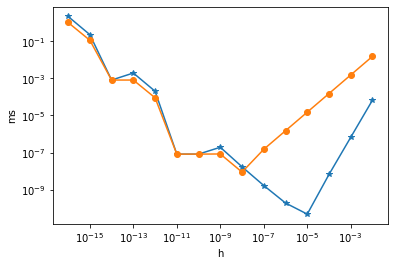

In [5]:
def der2p(f, x, h):
    return (f(x+h)-f(x))/h

h = np.array([1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16])
er1 = np.empty_like(h)
er2 = np.empty_like(h)
for i in range(len(h)):
    er1[i] = abs(deriv(f, 1, h[i]) - fder(1))
    er2[i] = abs(der2p(f, 1, h[i]) - fder(1))
plt.plot(h, er1, "-*")
plt.plot(h, er2, '-o')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("h")
plt.ylabel("ms")
plt.show()


### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [6]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for i in range(len(h)):
    err = deriv(f, x, h[i]) - fder(x)
    print("%5f -- %7.4g" % (h[i], err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05
0.000001 -- -1.386e-06
0.000000 -- -1.386e-07
0.000000 -- -1.386e-08
0.000000 -- -1.386e-09
0.000000 -- -1.386e-10
0.000000 -- -1.386e-11
0.000000 -- -1.386e-12
0.000000 -- -1.386e-13
0.000000 -- -1.386e-14
0.000000 -- -1.386e-15
0.000000 -- -1.386e-16


Остаточный член пропорционален третьей производной, то есть в нашем случае 1/x. Поэтому мы наблюдаем, что ошибка пропорциональна в свою очередь h.

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [7]:
def midpoint_rule(func, a, b, eps, double=False):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    I = (b-a)*func((a+b)/2)
    for N in range(3, 10000):
        if double == True:
            dt = np.linspace(a, b, 2*N)
        else:
            dt = np.linspace(a, b, N)
        pt = (dt[1:]+dt[:-1])/2
        h = dt[1]-dt[0]
        Inew = h*np.sum(func(pt))
        if abs(Inew-I)<eps:
            return Inew, N
        I = Inew

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


In [8]:
midpoint_rule(np.exp, 0, 1, 1e-10, double=False)

(1.7182817721905959, 1129)

In [9]:
midpoint_rule(np.exp, 0, 1, 1e-10, double=True)

(1.718281793102213, 712)

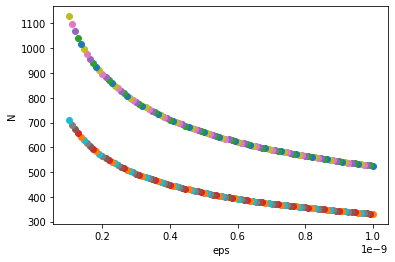

In [10]:
epsilon = np.linspace(1e-9, 1e-10, 100)
for eps in epsilon:
    I, N = midpoint_rule(np.exp, 0, 1, eps)
    plt.plot(eps, N, 'o')
    I1, N1 = midpoint_rule(np.exp, 0, 1, eps, double=True)
    plt.plot(eps, N1, 'o')
plt.xlabel("eps")
plt.ylabel("N")
plt.show()

Скорость сходимости падает, но в целом напоминает квадратичный спад, как и должно быть

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [11]:
def func(x):
    return np.sin(x**0.5)/x

def funcsing(x):
    return func(x)-np.sqrt(1/x)

def sing(x):
    return np.sqrt(1/x)


print(midpoint_rule(func, 0, 1, 1e-5), "straightforward")
print(midpoint_rule(funcsing, 0, 1, 1e-5)[0]+2, "/outsingularity")

(1.8727636980249804, 973) straightforward
1.8920519260705069 /outsingularity
